In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from PIL import Image

import keras
#from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
from keras.utils import to_categorical # convert to one-hot-encoding

from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [2]:
parent_folder_path = "C://Users//megha//Desktop//archive//IMG_CLASSES"

In [3]:
# create empty lists to store the image paths and their corresponding class labels
image_paths = []
class_labels = []

# create an empty dictionary to store the class label to subfolder name mappings
class_label_map = {}

# loop through each subfolder in the parent folder
for subfolder_name in os.listdir(parent_folder_path):
    # get the starting number of the subfolder name
    class_label = int(subfolder_name.split(".")[0]) - 1

    # add the class label and subfolder name to the dictionary
    class_label_map[class_label] = subfolder_name.split(".")[1].split(" ")[1]

    # loop through each image file in the subfolder
    subfolder_path = os.path.join(parent_folder_path, subfolder_name)
    for image_name in os.listdir(subfolder_path):
        # get the full path to the image file
        image_path = os.path.join(subfolder_path, image_name)
        # append the image path and class label to the lists
        image_paths.append(image_path)
        class_labels.append(class_label)

# create a pandas DataFrame from the image paths and class labels
data = {"image_path": image_paths, "class_label": class_labels}
df = pd.DataFrame(data)

# print the class label map
class_label_map

{0: 'Basal', 1: 'Benign', 2: 'Psoriasis', 3: 'Warts'}

In [4]:
df

,image_path,class_label
0,C://Users//megha//Desktop//archive//IMG_CLASSE...,0
1,C://Users//megha//Desktop//archive//IMG_CLASSE...,0
2,C://Users//megha//Desktop//archive//IMG_CLASSE...,0
3,C://Users//megha//Desktop//archive//IMG_CLASSE...,0
4,C://Users//megha//Desktop//archive//IMG_CLASSE...,0
...,...,...
9555,C://Users//megha//Desktop//archive//IMG_CLASSE...,3
9556,C://Users//megha//Desktop//archive//IMG_CLASSE...,3
9557,C://Users//megha//Desktop//archive//IMG_CLASSE...,3
9558,C://Users//megha//Desktop//archive//IMG_CLASSE...,3


In [5]:
# Define the directory containing the image dataset
data_dir = '/path/to/dataset'

# Get the list of subdirectories in the dataset directory (each subdirectory corresponds to a class)
class_names = os.listdir(parent_folder_path)

# Loop over the subdirectories and count the number of files in each one
for class_name in class_names:
    class_dir = os.path.join(parent_folder_path, class_name)
    num_images = len(os.listdir(class_dir))
    print("Class {}: {} images".format(class_name, num_images))

Class 1. Basal Cell Carcinoma (BCC) (3323): 3323 images
Class 2. Benign Keratosis-like Lesions (BKL) (2079): 2079 images
Class 3. Psoriasis pictures Lichen Planus and related diseases (2055): 2055 images
Class 4. Warts Molluscum and other Viral Infections (2103): 2103 images


<AxesSubplot:>

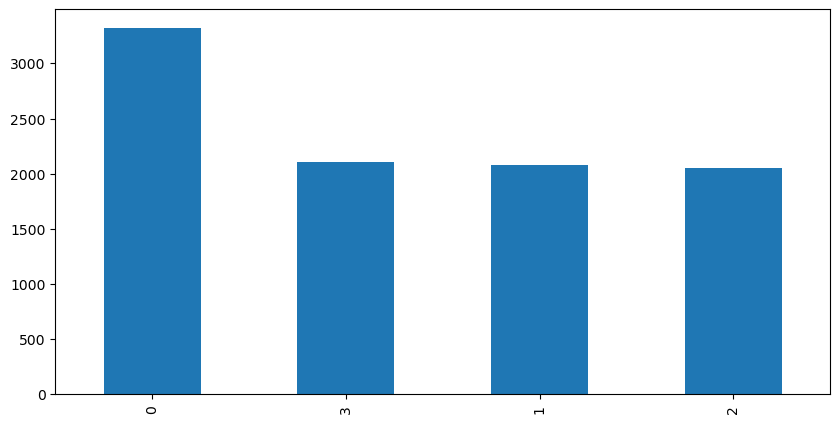

In [6]:
fig, ax1 = plt.subplots(1, 1, figsize= (10, 5))
df['class_label'].value_counts().plot(kind='bar', ax=ax1)

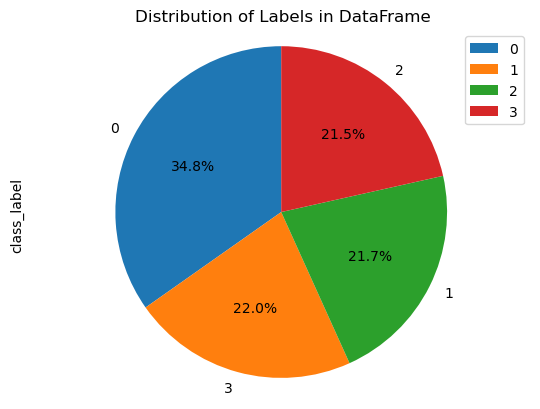

In [7]:
# Plot pie chart of train_df
df['class_label'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Labels in DataFrame')
plt.legend(df['class_label'].unique())
plt.show()

In [8]:
max_images_per_class = 2000

# Group by label column and take first max_images_per_class rows for each group
df = df.groupby("class_label").apply(lambda x: x.head(max_images_per_class)).reset_index(drop=True)

<AxesSubplot:>

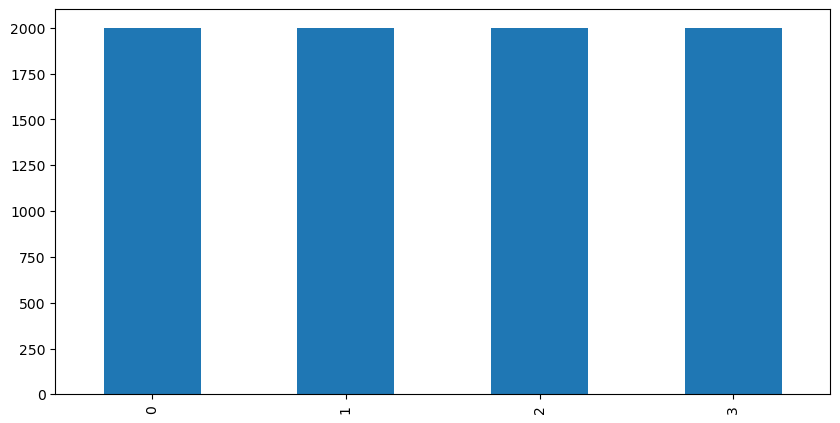

In [9]:
fig, ax1 = plt.subplots(1, 1, figsize= (10, 5))
df['class_label'].value_counts().plot(kind='bar', ax=ax1)

In [10]:
import concurrent.futures
import tensorflow as tf

# Allow gpu usage
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
try:
    tf.config.experimental.set_memory_growth = True
except Exception as ex:
    print(e)

[]


In [11]:
import multiprocessing

# Get the number of CPU cores available
max_workers = multiprocessing.cpu_count()
max_workers

12

In [12]:
# Define a function to resize image arrays
def resize_image_array(image_path):
    return np.asarray(Image.open(image_path).resize((100,75)))

# Use concurrent.futures to parallelize the resizing process
with concurrent.futures.ThreadPoolExecutor(max_workers=max_workers) as executor:
    # Use executor.map to apply the function to each image path in the DataFrame
    image_arrays = list(executor.map(resize_image_array, df['image_path'].tolist()))

# Add the resized image arrays to the DataFrame
df['image'] = image_arrays
del image_arrays
df

,image_path,class_label,image
0,C://Users//megha//Desktop//archive//IMG_CLASSE...,0,"[[[204, 174, 188], [204, 174, 187], [205, 175,..."
1,C://Users//megha//Desktop//archive//IMG_CLASSE...,0,"[[[179, 134, 131], [179, 135, 131], [184, 141,..."
2,C://Users//megha//Desktop//archive//IMG_CLASSE...,0,"[[[192, 143, 133], [190, 137, 130], [191, 139,..."
3,C://Users//megha//Desktop//archive//IMG_CLASSE...,0,"[[[54, 35, 32], [58, 40, 39], [72, 53, 52], [8..."
4,C://Users//megha//Desktop//archive//IMG_CLASSE...,0,"[[[181, 142, 142], [182, 142, 144], [186, 145,..."
...,...,...,...
7995,C://Users//megha//Desktop//archive//IMG_CLASSE...,3,"[[[19, 9, 8], [19, 9, 7], [19, 9, 6], [19, 9, ..."
7996,C://Users//megha//Desktop//archive//IMG_CLASSE...,3,"[[[27, 16, 13], [25, 14, 11], [26, 14, 12], [2..."
7997,C://Users//megha//Desktop//archive//IMG_CLASSE...,3,"[[[110, 92, 70], [113, 93, 68], [113, 91, 68],..."
7998,C://Users//megha//Desktop//archive//IMG_CLASSE...,3,"[[[133, 93, 60], [134, 94, 62], [137, 100, 72]..."


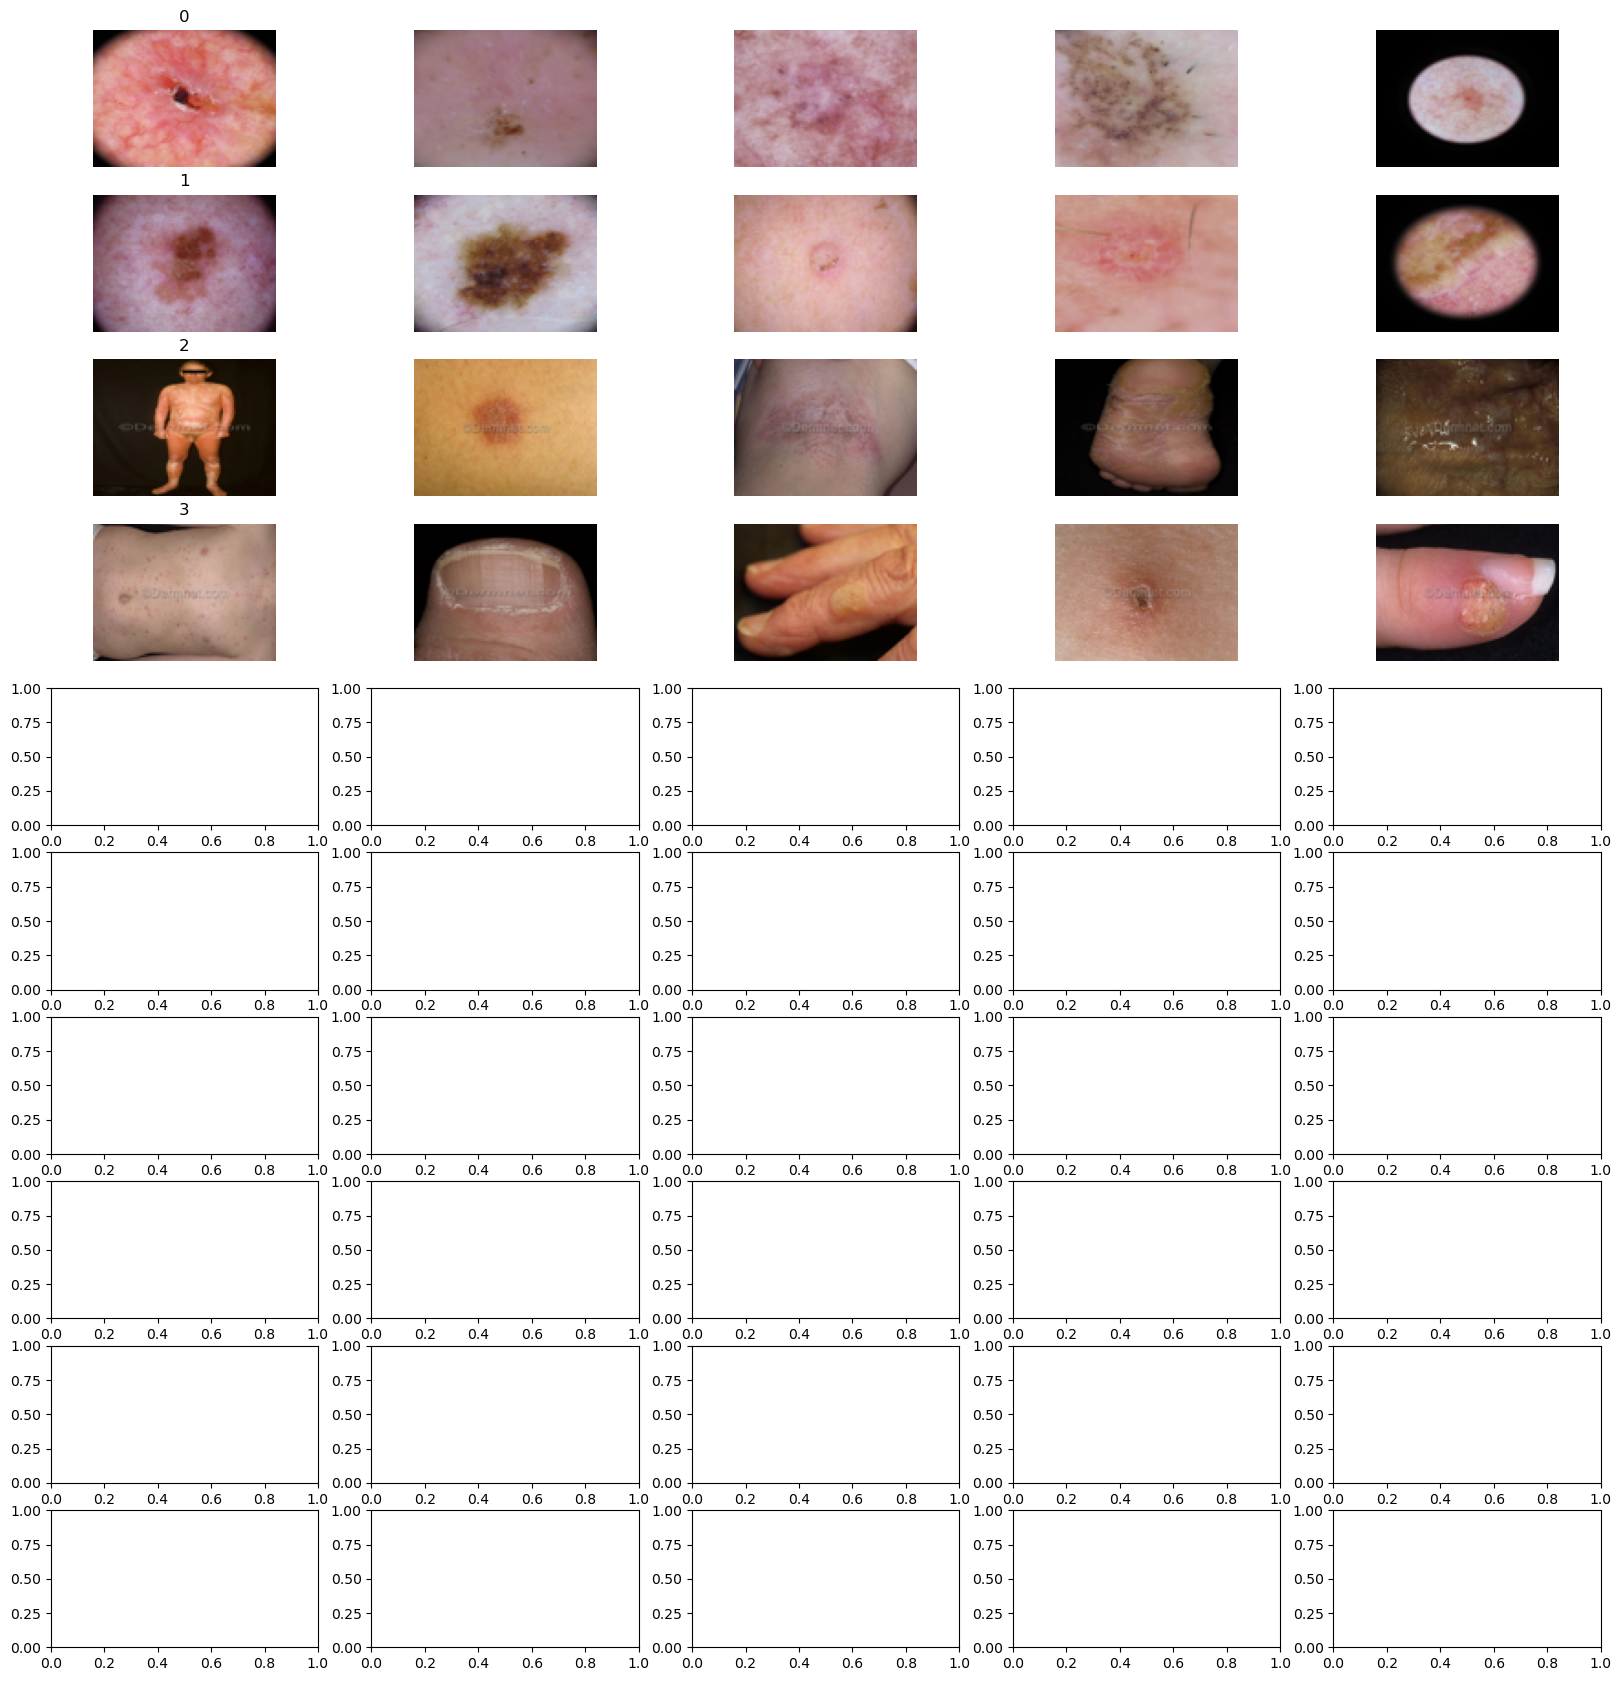

In [13]:
n_samples = 5
fig, m_axs = plt.subplots(10, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, df.sort_values(['class_label']).groupby('class_label')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

In [14]:
df['image'].map(lambda x: x.shape).value_counts()

(75, 100, 3)    8000
Name: image, dtype: int64

In [15]:
from keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator object with the desired transformations
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [16]:
# Create an empty dataframe to store the augmented images
augmented_df = pd.DataFrame(columns=['image_path', 'class_label', 'image'])

# Loop through each class label and generate additional images if needed
for class_label in df['class_label'].unique():
    # Get the image arrays for the current class
    image_arrays = df.loc[df['class_label'] == class_label, 'image'].values

    # Calculate the number of additional images needed for the current class
    num_images_needed = max_images_per_class - len(image_arrays)

    # Generate augmented images for the current class
    if num_images_needed > 0:
        # Select a random subset of the original images
        selected_images = np.random.choice(image_arrays, size=num_images_needed)

        # Apply transformations to the selected images and add them to the augmented dataframe
        for image_array in selected_images:
            # Reshape the image array to a 4D tensor with a batch size of 1
            image_tensor = np.expand_dims(image_array, axis=0)

            # Generate the augmented images
            augmented_images = datagen.flow(image_tensor, batch_size=1)

            # Extract the augmented image arrays and add them to the augmented dataframe
            for i in range(augmented_images.n):
                augmented_image_array = augmented_images.next()[0].astype('uint8')
                augmented_df = augmented_df.append({'image_path': None, 'class_label': class_label, 'image': augmented_image_array}, ignore_index=True)

    # Add the original images for the current class to the augmented dataframe
    original_images_df = df.loc[df['class_label'] == class_label, ['image_path', 'class_label', 'image']]
    augmented_df = augmented_df.append(original_images_df, ignore_index=True)

# Group the augmented dataframe by the 'label' column and filter out extra images
df = augmented_df.groupby('class_label').head(max_images_per_class)

del augmented_df

# Use the augmented dataframe for further processing
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

C:\Users\megha\AppData\Local\Temp\ipykernel_20336\2938377886.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  augmented_df = augmented_df.append(original_images_df, ignore_index=True)
C:\Users\megha\AppData\Local\Temp\ipykernel_20336\2938377886.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  augmented_df = augmented_df.append(original_images_df, ignore_index=True)
C:\Users\megha\AppData\Local\Temp\ipykernel_20336\2938377886.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  augmented_df = augmented_df.append(original_images_df, ignore_index=True)
C:\Users\megha\AppData\Local\Temp\ipykernel_20336\2938377886.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers

In [17]:
df.groupby('class_label').size()

class_label
0    2000
1    2000
2    2000
3    2000
dtype: int64

In [18]:
# Count the number of images in each class
class_counts = df['class_label'].value_counts().sort_index()

# Print the number of images in each class
print("Dataset Summary")
print("-" * 50)
print(f"{'Class Label':<15} {'Class Name':<30} {'Count':<10}")
print("-" * 50)
for class_label, class_name in class_label_map.items():
    count = class_counts[class_label]
    print(f"{class_label:<15} {class_name:<30} {count:<10}")
print("-" * 50)
print(f"{'Total':<45} {sum(class_counts):<10}")

Dataset Summary
--------------------------------------------------
Class Label     Class Name                     Count     
--------------------------------------------------
0               Basal                          2000      
1               Benign                         2000      
2               Psoriasis                      2000      
3               Warts                          2000      
--------------------------------------------------
Total                                         8000      


In [19]:
features=df.drop(columns=['class_label','image_path'],axis=1)
target=df['class_label']

In [20]:
features=df.drop(columns=['class_label','image_path'],axis=1)
target=df['class_label']

In [21]:
target.head()

0    1
1    1
2    0
3    1
4    2
Name: class_label, dtype: object

In [22]:
print(target.shape,features.shape)

(8000,) (8000, 1)


In [23]:
x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(features, target, test_size=0.20,random_state=1234)

In [24]:
x_train = np.asarray(x_train_o['image'].tolist())
x_test = np.asarray(x_test_o['image'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

In [25]:
# Perform one-hot encoding on the labels
y_train = to_categorical(y_train_o,num_classes = 10)
y_test = to_categorical(y_test_o,num_classes = 10)

In [26]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.1, random_state = 2)

In [27]:
import numpy as np

# Debugging
print("Original shape of x_train:", x_train.shape)

# Check total number of elements
original_size = np.prod(x_train.shape)
desired_size = 7776 * 75 * 100 * 3
print("Original size:", original_size)
print("Desired size:", desired_size)

# Reshape only if sizes match
if original_size == desired_size:
    x_train = x_train.reshape((7776, 75, 100, 3))
    x_test = x_test.reshape((x_test.shape[0], 75, 100, 3))
    x_validate = x_validate.reshape((x_validate.shape[0], 75, 100, 3))
    print("Reshaping successful!")
else:
    print("Sizes do not match. Check your data loading process.")


Original shape of x_train: (5760, 75, 100, 3)
Original size: 129600000
Desired size: 174960000
Sizes do not match. Check your data loading process.


In [28]:
num_classes = 10
from keras.optimizers import SGD
input_shape = (75,100,3)

from tensorflow.keras.applications.resnet import preprocess_input as resnet_preprocess_input
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

from tensorflow.keras.applications.resnet import ResNet50, preprocess_input as resnet_preprocess_input

# ResNet50
model = Sequential()
model.add(ResNet50(include_top=False, weights='imagenet', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))


In [29]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [30]:
# Compile the model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [31]:
# # Fit the model
epochs = 15
batch_size=32
history = model.fit(x=x_train,
                    y=y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_validate,y_validate),
                    callbacks=learning_rate_reduction)

Epoch 1/15



180/180 [==============================] - ETA: 0s - loss: 1.1204 - accuracy: 0.6767WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


180/180 [==============================] - 510s 3s/step - loss: 1.1204 - accuracy: 0.6767 - val_loss: 1.9865 - val_accuracy: 0.2266 - lr: 0.0100
Epoch 2/15
180/180 [==============================] - ETA: 0s - loss: 0.6840 - accuracy: 0.7828WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


180/180 [==============================] - 482s 3s/step - loss: 0.6840 - accuracy: 0.7828 - val_loss: 2.0976 - val_accuracy: 0.2344 - lr: 0.0100
Epoch 3/15
180/180 [==============================] - ETA: 0s - loss: 0.4606 - accuracy: 0.8441WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


180/180 [==============================] - 493s 3s/step - loss: 0.4606 - accuracy: 0.8441 - val_loss: 2.1568 - val_accuracy: 0.4109 - lr: 0.0100
Epoch 4/15
180/180 [==============================] - ETA: 0s - loss: 0.3634 - accuracy: 0.8766WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


180/180 [==============================] - 485s 3s/step - loss: 0.3634 - accuracy: 0.8766 - val_loss: 0.6118 - val_accuracy: 0.7609 - lr: 0.0100
Epoch 5/15
180/180 [==============================] - ETA: 0s - loss: 0.2539 - accuracy: 0.9073WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


180/180 [==============================] - 500s 3s/step - loss: 0.2539 - accuracy: 0.9073 - val_loss: 0.3505 - val_accuracy: 0.8844 - lr: 0.0100
Epoch 6/15
180/180 [==============================] - ETA: 0s - loss: 0.1895 - accuracy: 0.9309WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


180/180 [==============================] - 296s 2s/step - loss: 0.1895 - accuracy: 0.9309 - val_loss: 0.4719 - val_accuracy: 0.8422 - lr: 0.0100
Epoch 7/15
180/180 [==============================] - ETA: 0s - loss: 0.1294 - accuracy: 0.9523WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


180/180 [==============================] - 284s 2s/step - loss: 0.1294 - accuracy: 0.9523 - val_loss: 0.4490 - val_accuracy: 0.8656 - lr: 0.0100
Epoch 8/15
180/180 [==============================] - ETA: 0s - loss: 0.3739 - accuracy: 0.8790WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


180/180 [==============================] - 278s 2s/step - loss: 0.3739 - accuracy: 0.8790 - val_loss: 0.5329 - val_accuracy: 0.8047 - lr: 0.0100
Epoch 9/15
180/180 [==============================] - ETA: 0s - loss: 0.2190 - accuracy: 0.9236WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


180/180 [==============================] - 279s 2s/step - loss: 0.2190 - accuracy: 0.9236 - val_loss: 0.4377 - val_accuracy: 0.8625 - lr: 0.0100
Epoch 10/15
180/180 [==============================] - ETA: 0s - loss: 0.1775 - accuracy: 0.9418WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


180/180 [==============================] - 280s 2s/step - loss: 0.1775 - accuracy: 0.9418 - val_loss: 0.5128 - val_accuracy: 0.8641 - lr: 0.0100
Epoch 11/15
180/180 [==============================] - ETA: 0s - loss: 0.0887 - accuracy: 0.9712WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


180/180 [==============================] - 279s 2s/step - loss: 0.0887 - accuracy: 0.9712 - val_loss: 0.5080 - val_accuracy: 0.8484 - lr: 0.0100
Epoch 12/15
180/180 [==============================] - ETA: 0s - loss: 0.0613 - accuracy: 0.9774WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


180/180 [==============================] - 279s 2s/step - loss: 0.0613 - accuracy: 0.9774 - val_loss: 0.5004 - val_accuracy: 0.8859 - lr: 0.0100
Epoch 13/15
180/180 [==============================] - ETA: 0s - loss: 0.0370 - accuracy: 0.9872WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


180/180 [==============================] - 277s 2s/step - loss: 0.0370 - accuracy: 0.9872 - val_loss: 0.4474 - val_accuracy: 0.8891 - lr: 0.0100
Epoch 14/15
180/180 [==============================] - ETA: 0s - loss: 0.0438 - accuracy: 0.9865WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


180/180 [==============================] - 284s 2s/step - loss: 0.0438 - accuracy: 0.9865 - val_loss: 0.4987 - val_accuracy: 0.8891 - lr: 0.0100
Epoch 15/15
180/180 [==============================] - ETA: 0s - loss: 0.0476 - accuracy: 0.9839WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


180/180 [==============================] - 276s 2s/step - loss: 0.0476 - accuracy: 0.9839 - val_loss: 0.4153 - val_accuracy: 0.8891 - lr: 0.0100


50/50 [==============================] - 31s 576ms/step


<AxesSubplot:>

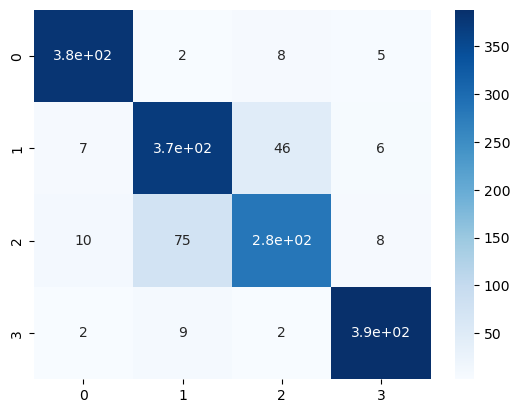

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the predicted probabilities for the test set
y_pred_prob = model.predict(x_test)

# Find the class with the highest probability for each sample
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

# Plot the confusion matrix using Seaborn
sns.heatmap(cm, annot=True, cmap='Blues')

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

# Calculate evaluation metrics
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
precision = precision_score(np.argmax(y_test, axis=1), y_pred, average='macro')
recall = recall_score(np.argmax(y_test, axis=1), y_pred, average='macro')
f1 = f1_score(np.argmax(y_test, axis=1), y_pred, average='macro')
kappa = cohen_kappa_score(np.argmax(y_test, axis=1), y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Kappa score: {kappa:.4f}")

Accuracy: 0.8875
Precision: 0.8879
Recall: 0.8862
F1-score: 0.8863
Kappa score: 0.8498


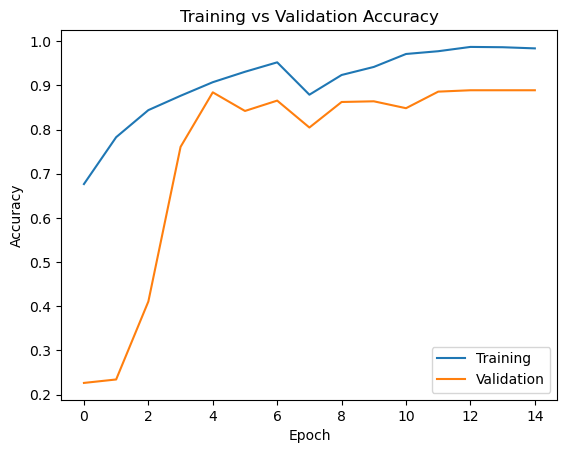

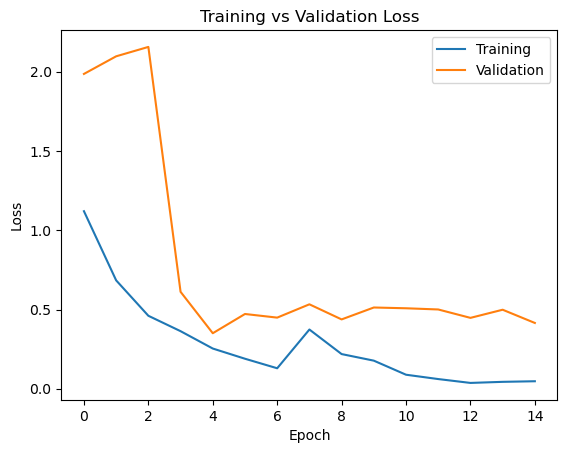

In [34]:
import matplotlib.pyplot as plt

# Get training and testing accuracy and loss histories
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot training and testing accuracy curves
plt.plot(training_accuracy)
plt.plot(validation_accuracy)
plt.title('Training vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

# Plot training and testing loss curves
plt.plot(training_loss)
plt.plot(validation_loss)
plt.title('Training vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [35]:
model.save('trained_model.h5')